# UPA - project 2 - Dataset for data mining 2
authors: xkryst02, xkrusi01, xseipe00

year: 2022/23

In [1]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

rawDf = pd.read_csv(config.RAW_DATA_PATH)

# Data frame for exploratory analysis
df = rawDf.copy()

## Irrelevant attributes

In [2]:
# Delete irrelevant
df = df.drop(columns=['Comments', 'Clutch Completion', 'studyName', 'Sample Number', 'Stage', 'Individual ID', 'Region'])

## Missing values - value fill

In [3]:
#Show missing values
print(df.isnull().sum())

Species                 0
Island                  0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


In [4]:
#Replace invalid value '.'
df.Sex.replace('.', np.nan, inplace=True)

print(df.isnull().sum())

Species                 0
Island                  0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64


In [5]:
#Fill missing numerical values with mean
for i in df.columns[df.dtypes == float]:
    df[i].fillna(df[i].mean(), inplace=True)

print(df.isnull().sum())

Species                 0
Island                  0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    11
Delta 15 N (o/oo)       0
Delta 13 C (o/oo)       0
dtype: int64


In [6]:
#Remove missing categorical values
df = df.dropna(subset=["Sex"]) 

print(df.isnull().sum())

Species                0
Island                 0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64


## Handle outliers

In [7]:
# Our dataset doesn't have any outliers, but if it had some, it would delete them with this 
# Based on abs(z-score) > 3 

oldDf = df

numericOnly = df.select_dtypes(include=NUMERICS)
for column in numericOnly.columns:
    wrong = numericOnly[(np.abs(stats.zscore(numericOnly[column])) > 3)]
    df = pd.merge(df,wrong, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

# Number of deleted records
oldDf.shape[0] - df.shape[0]

0

## Convert categoric attributes to numeric

In [8]:
#Show data types
print(df.dtypes)

Species                 object
Island                  object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object


In [9]:
#Show data before conversion
display(df)

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.1,18.7,181.0,3750.0,MALE,8.733382,-25.686292
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.949560,-24.694540
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.368210,-25.333020
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.766510,-25.324260
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.664960,-25.298050
...,...,...,...,...,...,...,...,...,...,...
328,Gentoo penguin (Pygoscelis papua),Biscoe,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.991840,-26.205380
329,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.411510,-26.138320
330,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.301660,-26.041170
331,Gentoo penguin (Pygoscelis papua),Biscoe,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.242460,-26.119690


In [10]:
#Convert categoric attributes to numeric with method 'pd.factorize'
df["Species"], species_labels = pd.factorize(df["Species"])
df["Island"] = pd.factorize(df["Island"])[0]

#Convert categoric attributes to numeric manually with method 'replace'
df["Sex"].replace(["FEMALE", "MALE"], [0, 1], inplace=True)
sex_labels = ["Female", "Male"]

#Convert date to datetime format
df["Date Egg"] = pd.to_datetime(df["Date Egg"], format="%m/%d/%y")

#Show data types after conversion
print(df.dtypes)

Species                         int64
Island                          int64
Date Egg               datetime64[ns]
Culmen Length (mm)            float64
Culmen Depth (mm)             float64
Flipper Length (mm)           float64
Body Mass (g)                 float64
Sex                             int64
Delta 15 N (o/oo)             float64
Delta 13 C (o/oo)             float64
dtype: object


In [11]:
#Show data after conversion
display(df)

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2007-11-11,39.1,18.7,181.0,3750.0,1,8.733382,-25.686292
1,0,0,2007-11-11,39.5,17.4,186.0,3800.0,0,8.949560,-24.694540
2,0,0,2007-11-16,40.3,18.0,195.0,3250.0,0,8.368210,-25.333020
3,0,0,2007-11-16,36.7,19.3,193.0,3450.0,0,8.766510,-25.324260
4,0,0,2007-11-16,39.3,20.6,190.0,3650.0,1,8.664960,-25.298050
...,...,...,...,...,...,...,...,...,...,...
328,2,1,2009-12-01,47.2,13.7,214.0,4925.0,0,7.991840,-26.205380
329,2,1,2009-11-22,46.8,14.3,215.0,4850.0,0,8.411510,-26.138320
330,2,1,2009-11-22,50.4,15.7,222.0,5750.0,1,8.301660,-26.041170
331,2,1,2009-11-22,45.2,14.8,212.0,5200.0,0,8.242460,-26.119690


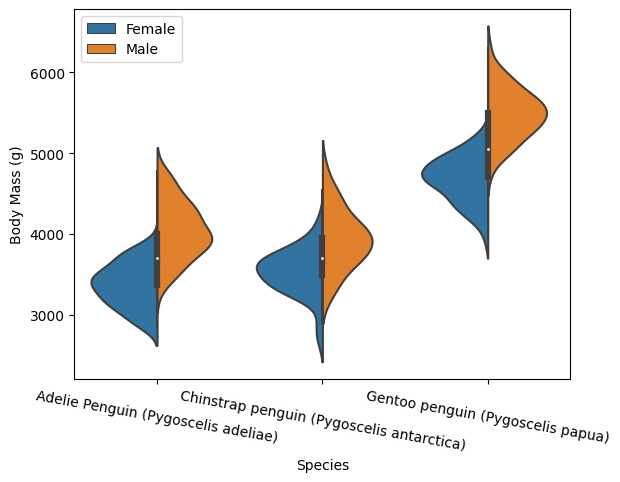

In [12]:
#Plot data with category names they had before conversion
ax = sns.violinplot(data = df, x = "Species", y = "Body Mass (g)", hue="Sex", split=True)
ax.set_xticklabels(species_labels, rotation=-10)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=sex_labels)

### Normalize where adequate

In [13]:
# Columns that are adequate
columns = ['Culmen Length (mm)', 'Flipper Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

# Normalize
for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# View normalized data
display('MIN:',df.min())
display('MAX:', df.max())
df

'MIN:'

Species                                  0
Island                                   0
Date Egg               2007-11-09 00:00:00
Culmen Length (mm)                     0.0
Culmen Depth (mm)                      0.0
Flipper Length (mm)                    0.0
Body Mass (g)                          0.0
Sex                                      0
Delta 15 N (o/oo)                      0.0
Delta 13 C (o/oo)                      0.0
dtype: object

'MAX:'

Species                                  2
Island                                   2
Date Egg               2009-12-01 00:00:00
Culmen Length (mm)                     1.0
Culmen Depth (mm)                      1.0
Flipper Length (mm)                    1.0
Body Mass (g)                          1.0
Sex                                      1
Delta 15 N (o/oo)                      1.0
Delta 13 C (o/oo)                      1.0
dtype: object

,Species,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2007-11-11,0.254545,0.666667,0.152542,0.291667,1,0.460122,0.412350
1,0,0,2007-11-11,0.269091,0.511905,0.237288,0.305556,0,0.550450,0.719311
2,0,0,2007-11-16,0.298182,0.583333,0.389831,0.152778,0,0.307537,0.521692
3,0,0,2007-11-16,0.167273,0.738095,0.355932,0.208333,0,0.473964,0.524404
4,0,0,2007-11-16,0.261818,0.892857,0.305085,0.263889,1,0.431532,0.532516
...,...,...,...,...,...,...,...,...,...,...
328,2,1,2009-12-01,0.549091,0.071429,0.711864,0.618056,0,0.150273,0.251685
329,2,1,2009-11-22,0.534545,0.142857,0.728814,0.597222,0,0.325630,0.272441
330,2,1,2009-11-22,0.665455,0.309524,0.847458,0.847222,1,0.279730,0.302510
331,2,1,2009-11-22,0.476364,0.202381,0.677966,0.694444,0,0.254993,0.278207
